In [129]:
import string

import numpy as np
import os
import email
import email.policy

os.listdir('./dataset')

['ham', 'spam']

In [130]:
hams = os.listdir('./dataset/ham')
spams = os.listdir('./dataset/spam')

In [131]:
def l_email(email_name):
    with open(email_name, 'rb') as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)


def l_spam(filename):
    return l_email(os.path.join('./dataset/spam', filename))


def l_ham(filename):
    return l_email(os.path.join('./dataset/ham', filename))

In [132]:
# Subject - Probably can be used by itself
# From - May contain usefully information
# Content-Type - Ham emails less likely to have html type

In [133]:
import pandas as pd

spams = list(map(lambda x: l_spam(x), spams))
hams = list(map(lambda x: l_ham(x), hams))

In [173]:
def as_valid(emails):
    valid = []

    for index, email in enumerate(emails):
        try:
            email.get_body().get_content()

            valid.append(email)
        except LookupError:
            continue
        except AttributeError:
            continue

    return valid


def parse_subjects(emails):
    return [email.get('Subject') for email in emails]


def parse_types(emails):
    def get_type(email):
        if email.get('Content-Type') is None:
            return None

        return email.get('Content-Type').split(';')[0].lower()

    return [get_type(email) for email in emails]


def parse_content(emails):
    return [email.get_body().get_content() for email in emails]


def to_df(emails):
    valid = as_valid(emails)

    return pd.DataFrame(
        {'subject': subjects_to_series(valid), 'type': parse_types(valid), 'content': parse_content(valid)})

In [176]:
spams_df = to_df(spams)
hams_df = to_df(hams)

<AxesSubplot:>

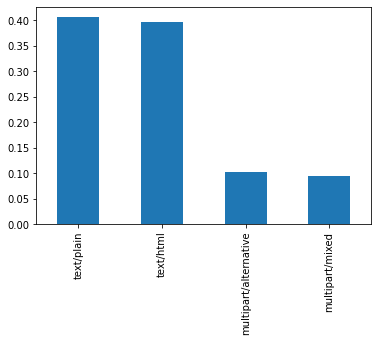

In [175]:
spams_df['type'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

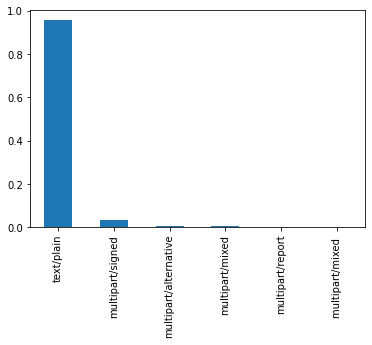

In [181]:
# html type is a good metric to find out spam emails
hams_df['type'].value_counts(normalize=True).plot(kind='bar')

In [199]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Khaimov\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [238]:
import string
import re

ps = nltk.stem.PorterStemmer()


def subject_to_words(subject):
    no_punctuation = subject.translate(str.maketrans('', '', string.punctuation))
    no_digits = re.sub(r'\d+', 'digit', no_punctuation)

    words = nltk.word_tokenize(no_digits)

    return [ps.stem(word) for word in words]


def subjects_to_series(emails):
    subjects = emails['subject'][emails['subject'].notnull()]
    words = sum([subject_to_words(subject) for subject in subjects], [])

    return pd.Series(words)



In [239]:
subjects_to_series(spams_df).value_counts(normalize=True)

digit      0.056790
your       0.026102
for        0.018342
the        0.017989
you        0.016578
             ...   
ltc        0.000353
declin     0.000353
cyberag    0.000353
jenni      0.000353
faeri      0.000353
Length: 944, dtype: float64

In [240]:
subjects_to_series(hams_df).value_counts(normalize=True)

re                                                    0.091961
the                                                   0.025609
digit                                                 0.021775
for                                                   0.020337
to                                                    0.014311
                                                        ...   
daypop                                                0.000068
badg                                                  0.000068
trek                                                  0.000068
httpradioweblogscomdigitimagesdigituncsammediumgif    0.000068
gain                                                  0.000068
Length: 2921, dtype: float64